<a href="https://colab.research.google.com/github/Abhishek-Singh-AS/Projects.ipynb/blob/main/GLRLM_WITH_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Trainingdata"
categories = ["Normal", "Pneumonia"]
data = []
target = []

for category in categories:
    folder_path = os.path.join(path, category)
    img_names = os.listdir(folder_path)

    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256, 256))
        data.append(img)
        target.append(category)

data = np.array(data)
target = np.array(target)
print(len(data))


4883


In [ ]:
from skimage.feature import greycomatrix, greycoprops

glrlm_features = []

for img in data:
    glrlm = greycomatrix(img, [1, 2], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)
    glrlm_features.append([greycoprops(glrlm, "dissimilarity")[0, 0], 
                           greycoprops(glrlm, "correlation")[0, 0], 
                           greycoprops(glrlm, "energy")[0, 0], 
                           greycoprops(glrlm, "homogeneity")[0, 0]])

glrlm_features = np.array(glrlm_features)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(glrlm_features, target, test_size=0.1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn import svm
model=svm.SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
path = "/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Testdata"
categories = ["Normal", "Pneumonia"]
data = []
target = []

for category in categories:
    folder_path = os.path.join(path, category)
    img_names = os.listdir(folder_path)

    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256, 256))
        
        data.append(img)
        target.append(category)

data = np.array(data)
target = np.array(target)


In [ ]:
from skimage.feature import greycomatrix, greycoprops

glrlm_features = []

for img in data:
    glrlm = greycomatrix(img, [1, 2], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)
    glrlm_features.append([greycoprops(glrlm, "dissimilarity")[0, 0], 
                           greycoprops(glrlm, "correlation")[0, 0], 
                           greycoprops(glrlm, "energy")[0, 0], 
                           greycoprops(glrlm, "homogeneity")[0, 0]])

glrlm_features = np.array(glrlm_features)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(glrlm_features, target, test_size=0.25, random_state=42)
prediction=model.predict(X_test)

# RF Accuracy

Accuracy:  0.930327868852459
Matrix :  [[ 65  10]
 [  7 162]]


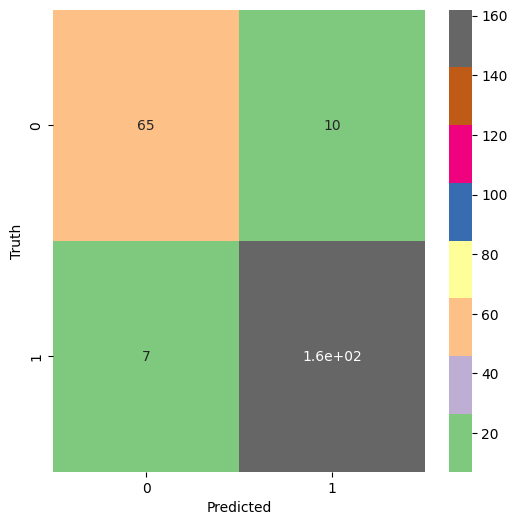

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
accuracy=accuracy_score(y_test,prediction,normalize=True)
matrix=confusion_matrix(y_test,prediction)
print('Accuracy: ',accuracy)
print('Matrix : ',matrix)
plt.figure(figsize = (6,6))
sb.heatmap(matrix, annot=True,cmap="Accent")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# SVM Accuracy

Accuracy:  0.8155737704918032
Matrix :  [[ 44  31]
 [ 14 155]]


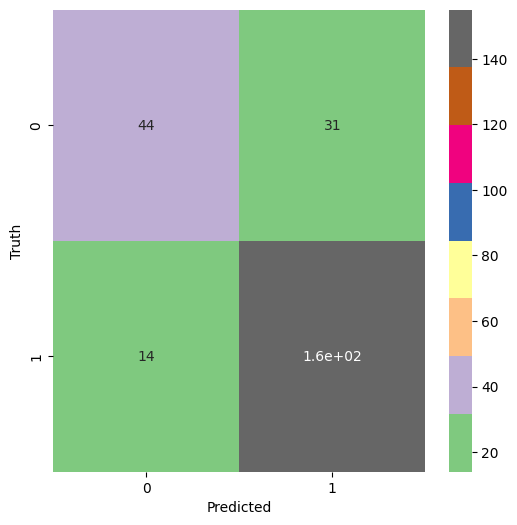

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
accuracy=accuracy_score(y_test,prediction,normalize=True)
matrix=confusion_matrix(y_test,prediction)
print('Accuracy: ',accuracy)
print('Matrix : ',matrix)
plt.figure(figsize = (6,6))
sb.heatmap(matrix, annot=True,cmap="Accent")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Logistic Regression

Accuracy:  0.8073770491803278
Matrix :  [[ 41  34]
 [ 13 156]]


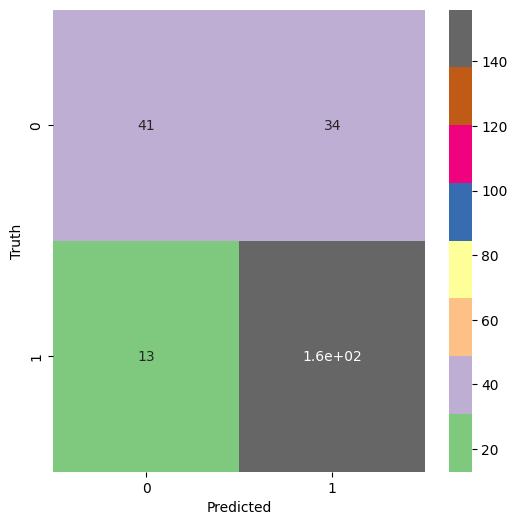

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
accuracy=accuracy_score(y_test,prediction,normalize=True)
matrix=confusion_matrix(y_test,prediction)
print('Accuracy: ',accuracy)
print('Matrix : ',matrix)
plt.figure(figsize = (6,6))
sb.heatmap(matrix, annot=True,cmap="Accent")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Decision Tree

Accuracy:  0.9221311475409836
Matrix :  [[ 63  12]
 [  7 162]]


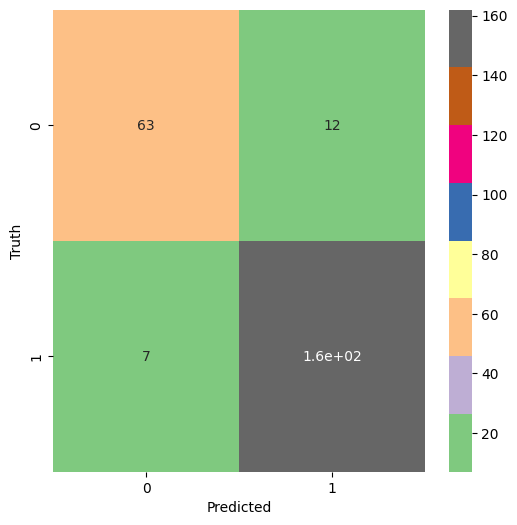

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
accuracy=accuracy_score(y_test,prediction,normalize=True)
matrix=confusion_matrix(y_test,prediction)
print('Accuracy: ',accuracy)
print('Matrix : ',matrix)
plt.figure(figsize = (6,6))
sb.heatmap(matrix, annot=True,cmap="Accent")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# AdaBoost Accuracy

Accuracy:  0.8356164383561644
Matrix :  [[ 65  21]
 [ 27 179]]


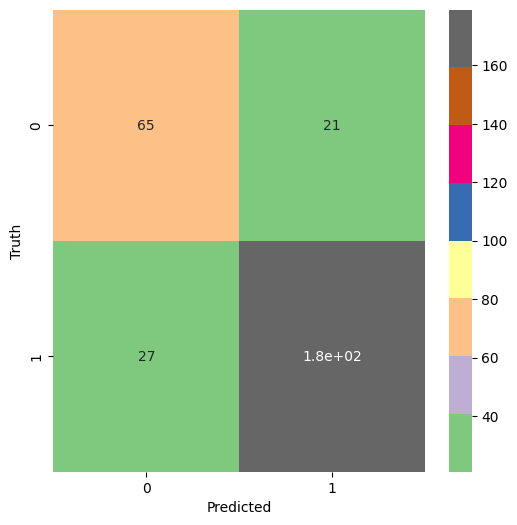

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
accuracy=accuracy_score(y_test,prediction,normalize=True)
matrix=confusion_matrix(y_test,prediction)
print('Accuracy: ',accuracy)
print('Matrix : ',matrix)
plt.figure(figsize = (6,6))
sb.heatmap(matrix, annot=True,cmap="Accent")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
train_path = "/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Trainingdata"
test_path = "/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Testdata"
# Define categories
categories = ['Normal', 'Pneumonia']

# Define image size
img_size = 256

# Load images and create feature matrix X and target vector y
def load_data(path):
    X = []
    y = []
    for category in categories:
        folder_path = os.path.join(path, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(categories.index(category))
    X = np.array(X)
    y = np.array(y)
    return X, y

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)


In [ ]:
# Extract GLCM features from images
def extract_features(X):
    features = []
    for img in X:
        glcm = greycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0][0]
        dissimilarity = greycoprops(glcm, 'dissimilarity')[0][0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0][0]
        energy = greycoprops(glcm, 'energy')[0][0]
        features.append([contrast, dissimilarity, homogeneity, energy])
    features = np.array(features)
    return features

X_train = extract_features(X_train)
X_test = extract_features(X_test)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')

In [ ]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on validation set and calculate accuracy
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print('Validation accuracy:', acc)

# Predict on test set and calculate accuracy
y_pred = clf.predict(X_test_scaled)
acc = clf.accuracy_score(y_test, y_pred)
print('Test accuracy:', acc)


Validation accuracy: 0.625
Test accuracy: 0.6772867420349434


In [ ]:
# Train-test split
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
from sklearn import svm
model=svm.SVC(random_state=0)
model.fit(X_train, y_train)
# Predict on validation set and calculate accuracy
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print('Validation accuracy:', acc)

# Predict on test set and calculate accuracy
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc)


Validation accuracy: 0.8059701492537313
Test accuracy: 0.7512846865364851


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
# Predict on validation set and calculate accuracy
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print('Validation accuracy:', acc)

# Predict on test set and calculate accuracy
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc)


Validation accuracy: 0.8544839255499154
Test accuracy: 0.7862281603288798


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from tqdm import tqdm


In [ ]:
def extract_lbp_features(img_path, radius=1, n_points=8):
    img = cv2.imread(img_path)
    img_gray = rgb2gray(img)
    lbp = local_binary_pattern(img_gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

In [ ]:
#train="/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Trainingdata"
#test="/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Testdata"

train_normal_path = "/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Trainingdata/Normal"
train_pneumonia_path = "/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Trainingdata/Pneumonia"
test_normal_path = "/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Testdata/Normal"
test_pneumonia_path = "/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Testdata/Pneumonia"

train_data = []
train_labels = []
for img_path in tqdm(os.listdir(train_normal_path)):
    lbp_features = extract_lbp_features(os.path.join(train_normal_path, img_path))
    train_data.append(lbp_features)
    train_labels.append(0)
for img_path in tqdm(os.listdir(train_pneumonia_path)):
    lbp_features = extract_lbp_features(os.path.join(train_pneumonia_path, img_path))
    train_data.append(lbp_features)
    train_labels.append(1)

test_data = []
test_labels = []
for img_path in tqdm(os.listdir(test_normal_path)):
    lbp_features = extract_lbp_features(os.path.join(test_normal_path, img_path))
    test_data.append(lbp_features)
    test_labels.append(0)
for img_path in tqdm(os.listdir(test_pneumonia_path)):
    lbp_features = extract_lbp_features(os.path.join(test_pneumonia_path, img_path))
    test_data.append(lbp_features)
    test_labels.append(1)

train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)


100%|██████████| 673/673 [01:11<00:00,  9.42it/s]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print('Test accuracy:', acc)

Test accuracy: 0.9375639713408394


In [ ]:
from sklearn import svm
clf=svm.SVC(random_state=0)
clf.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print('Test Accuracy:', acc)

Test Accuracy: 0.9293756397134084


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf.predict(X_val)
acc = accuracy_score(y_pred, y_val)
print('Test Accuracy:', acc)

Test Accuracy: 0.9355168884339816


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = model.predict(X_val)
acc = accuracy_score(y_pred, y_val)
print('Test Accuracy:', acc)

Test Accuracy: 0.901740020470829


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_val)
acc = accuracy_score(y_pred, y_val)
print('Test Accuracy:', acc)

Test Accuracy: 0.7236438075742068


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred = model.predict(X_val)
acc = accuracy_score(y_pred, y_val)
print('Test Accuracy:', acc)

Test Accuracy: 0.9273285568065507


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline

Process the images and resize them to the preferred size

In [ ]:
labels = ['Pneumonia', 'Normal']
img_size = 200
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Preparing the training and testing data

In [ ]:
train = get_training_data("/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Trainingdata")
test = get_training_data("/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Testdata")

In [ ]:
pnenumonia = 0 
normal = 0 

for i, j in train:
    if j == 0:
        pnenumonia+=1
    else:
        normal+=1
        
print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 3600
Normal: 1283
Pneumonia - Normal: 2317


Visualize training image

Pneumonia


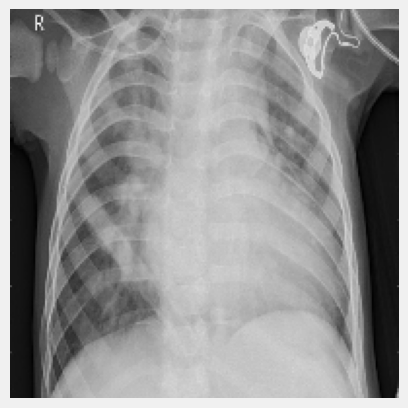

In [ ]:
plt.imshow(train[1][0], cmap='gray')
plt.axis('off')
print(labels[train[1][1]])

In [ ]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)
    



# resize data for deep learning 
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [ ]:
X_train = X_train / 255
X_test = X_test / 255


In [ ]:
# good for balancing out disproportions in the dataset 
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=90, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True)  

#datagen.fit(X_train)

In [ ]:
IMAGE_SIZE = [224,224]
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE+[3])

In [ ]:
# Define the model architecture
model = Sequential()
model.add(vgg16)
#model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Conv2D(256, (3, 3), input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Define early stopping and optimizer
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
adam = Adam(learning_rate=0.0001)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         1179904   
                                                                 
 activation_10 (Activation)  (None, 7, 7, 256)         0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)        0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 4, 4, 256)        1024      
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)         

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds, callbacks=callbacks_list)

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import os
import cv2
import matplotlib.pyplot as plt
import PIL.Image as img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_dir="/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Trainingdata"
test_dir="/content/drive/MyDrive/illness/Pneumonia_Chest _X-ray_Dataset/Testdata"